# Analysis of the Hotel Demands and Bookings Cancellation

Hotels booking cancelation make it harder to accurately forecast and optimize
occupancy which in turn results in revenue loss. The goal of this project is to
predict in advance weather a hotel customer will cancel his booking or not.
Predicting future booking cancellation can help hotels plan for cancellation and
refund policies, staffing schedules as well as targeting customers with offers and
discounts. It is also important to understand key booking cancellation factors and
how those factors relate to booking cancellation.

## Import Libaries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn import preprocessing
from sklearn import metrics
from pycaret.classification import *

## Load dataset

I used "Hotel booking demand” dataset available on Kaggle(https://www.kaggle.com/jessemostipak/hotel-booking-demand).

In [4]:
df_booking = pd.read_csv('hotel_bookings.csv')

In [5]:
df_booking.shape

(119390, 32)

## EDA



## Exploring the Null values


In [6]:
df_booking.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


The dataset consists of 119,390 observations with 32 features. The individual
sample/unit of analysis in this project is a single booking made by a hotel
customer. There are 32 features related to the booking, including booking date,
lead time, number of adults, children, babes, deposit type and previous
cancellations.

In [7]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
# Check for nulls 
 
print ("Top Columns having missing values") 
 
missmap = df_booking.isnull().sum().to_frame() 
missmap = missmap.sort_values(0, ascending = False) 
missmap.head()

Top Columns having missing values


,0
company,112593
agent,16340
country,488
children,4
reserved_room_type,0


In [10]:
# drop the company column as it is dominated by Null values
df_booking.drop(columns=['company'],axis=1, inplace=True)

# drop the raws with missing children values (only 4 raws)
df_booking.dropna(subset=['children'], inplace=True)

df_booking['country'].replace(np.nan,df_booking['country'].mode().values[0], inplace=True)

# try non-existing value
df_booking['agent'].replace(np.nan,df_booking['agent'].max(), inplace=True)

In [11]:
# Check for nulls 
 
print ("Top Columns having missing values") 
 
missmap = df_booking.isnull().sum().to_frame() 
missmap = missmap.sort_values(0, ascending = False) 
missmap.head()

Top Columns having missing values


,0
hotel,0
is_repeated_guest,0
reservation_status,0
total_of_special_requests,0
required_car_parking_spaces,0


## Exploring  data types  and values

In [12]:

columns=df_booking.columns

for col in columns:
    print('{} Possible Values:{}'.format(col,df_booking[col].unique()))

hotel Possible Values:['Resort Hotel' 'City Hotel']
is_canceled Possible Values:[0 1]
lead_time Possible Values:[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174

### Change type of arrival_date_month,children agent

In [13]:
df_booking['arrival_date_month']=df_booking['arrival_date_month'].astype(str)
df_booking['children']=df_booking['children'].astype(int)
df_booking['agent']=df_booking['agent'].astype(int)


In [14]:
df_booking.is_canceled.value_counts()


0    75166
1    44220
Name: is_canceled, dtype: int64

### Create new booking_date Column

In [15]:
# Take the date and time fields into a single datetime column

df=pd.DataFrame({
    'year':df_booking.arrival_date_year,
    'month': df_booking.arrival_date_month,
    'day': df_booking.arrival_date_day_of_month
})
df['month'] = pd.to_datetime(df.month, format='%B').dt.month
df_booking["booking_date"] = pd.to_datetime(df)


In [16]:
df_booking["booking_date"]

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: booking_date, Length: 119386, dtype: datetime64[ns]

### Identify months with highest number of cancellation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

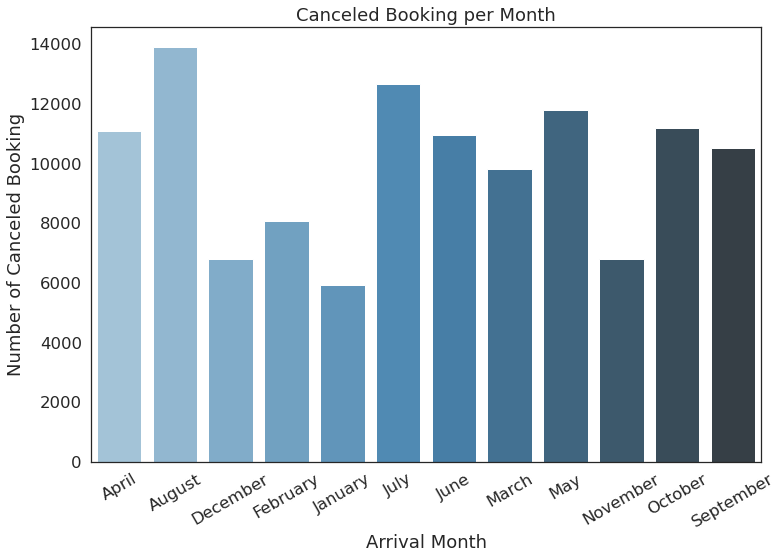

In [17]:
sns.set_theme(style="white",font_scale =1.5)

cancel_month=df_booking.groupby(['arrival_date_month']).agg('count').reset_index()
cancelled=cancel_month.iloc[:,0:3]

plt.figure(figsize=(12, 8))
sns.barplot(x = "arrival_date_month", y = "is_canceled", data=cancelled, palette="Blues_d", )
plt.xlabel('Arrival Month')
plt.ylabel('Number of Canceled Booking')

plt.title('Canceled Booking per Month')
plt.xticks(rotation=30)

### Change columns order

In [18]:

cols=['is_canceled','hotel','lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date','booking_date']
df_booking=df_booking[cols] 

### Encode categorical features as numbers

In [19]:

categoricalfeatures=['hotel',
 'arrival_date_year',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'booking_date'
]
le = preprocessing.LabelEncoder()
for feature in categoricalfeatures:
    df_booking[feature] = le.fit_transform(df_booking[feature])

In [20]:
df_booking

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_date
0,0,1,342,0,5,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,3,0,535,0,2,0.00,0,0,1,2015-07-01,0
1,0,1,737,0,5,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,4,0,535,0,2,0.00,0,0,1,2015-07-01,0
2,0,1,7,0,5,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,535,0,2,75.00,0,0,1,2015-07-02,0
3,0,1,13,0,5,27,1,0,1,1,0,0,0,59,2,0,0,0,0,0,0,0,0,304,0,2,75.00,0,0,1,2015-07-02,0
4,0,1,14,0,5,27,1,0,2,2,0,0,0,59,6,3,0,0,0,0,0,0,0,240,0,2,98.00,0,1,1,2015-07-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,1,35,30,2,5,2,0,0,0,15,5,3,0,0,0,0,0,0,0,394,0,2,96.14,0,0,1,2017-09-06,791
119386,0,0,102,2,1,35,31,2,5,3,0,0,0,56,6,3,0,0,0,4,4,0,0,9,0,2,225.43,0,2,1,2017-09-07,792
119387,0,0,34,2,1,35,31,2,5,2,0,0,0,43,6,3,0,0,0,3,3,0,0,9,0,2,157.71,0,4,1,2017-09-07,792
119388,0,0,109,2,1,35,31,2,5,2,0,0,0,59,6,3,0,0,0,0,0,0,0,89,0,2,104.40,0,0,1,2017-09-07,792


### Compute and display correlation matrix

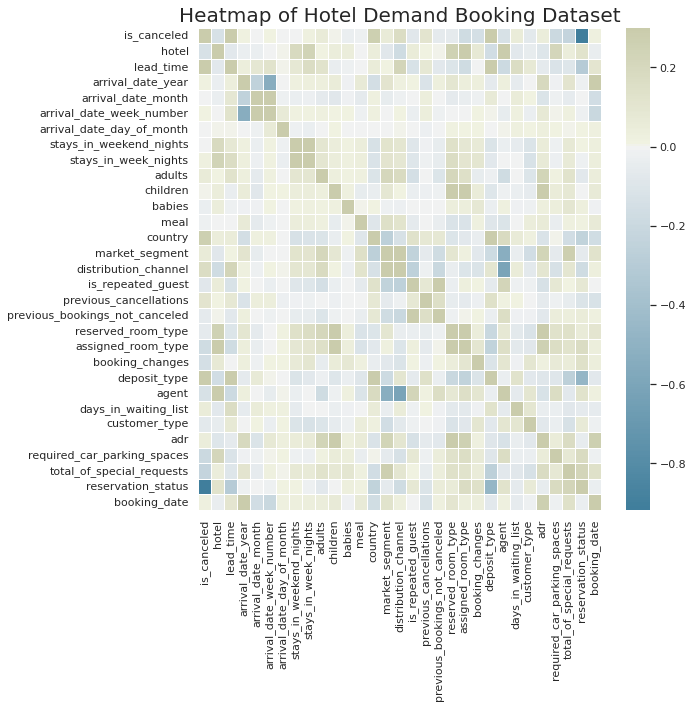

In [22]:


sns.set_theme(style="white",font_scale = 1)

# Generate a large random dataset
rs = np.random.RandomState(42)
#d = df_booking.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],axis=1)
d = df_booking
corr = d.corr()


f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(230, 90, as_cmap=True)


heat_plot =sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
             linewidths=1, )

fig = heat_plot.get_figure()
plt.title('Heatmap of Hotel Demand Booking Dataset',fontsize = 20)
plt.tight_layout() 
fig.savefig('heat_plot.jpg') 
 

In [23]:
cor = (d.corr()**2)**0.5
cor_mat = cor["is_canceled"].sort_values(ascending=True)
cor_mat*100

arrival_date_month                  0.143516
stays_in_weekend_nights             0.178338
children                            0.504779
arrival_date_day_of_month           0.608413
arrival_date_week_number            0.813199
arrival_date_year                   1.673249
meal                                1.765548
booking_date                        2.365481
stays_in_week_nights                2.477143
babies                              3.248845
adr                                 4.762222
days_in_waiting_list                5.419315
previous_bookings_not_canceled      5.735537
market_segment                      5.931354
adults                              5.999027
reserved_room_type                  6.128396
customer_type                       6.820990
is_repeated_guest                   8.478795
previous_cancellations             11.014047
agent                              12.823315
hotel                              13.650527
booking_changes                    14.437057
distributi


The heatmap reveals statistically significant correlations between the target variable and reservation_ status, lead_time, country, deposit_type. By checking reservation_ status values, it appears that it is highly correlated with the target and should be eliminated from further analysis.

In [24]:
# since is_canceled is almost the same as reservation_status we will drop both reservation_status and reservation_status_date
#df_booking.drop(['reservation_status'],axis=1,inplace=True)
df_booking.drop(['reservation_status','reservation_status_date'],axis=1,inplace=True)

In [25]:
df_booking.head()

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,booking_date
0,0,1,342,0,5,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,3,0,535,0,2,0.0,0,0,0
1,0,1,737,0,5,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,4,0,535,0,2,0.0,0,0,0
2,0,1,7,0,5,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,535,0,2,75.0,0,0,0
3,0,1,13,0,5,27,1,0,1,1,0,0,0,59,2,0,0,0,0,0,0,0,0,304,0,2,75.0,0,0,0
4,0,1,14,0,5,27,1,0,2,2,0,0,0,59,6,3,0,0,0,0,0,0,0,240,0,2,98.0,0,1,0


## Build Model

### Stratify split the data into 80% Training and 30% Testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_booking.iloc[:, 1:], df_booking.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42, stratify=df_booking.iloc[:, 0])
train_df = X_train.copy()
train_df['is_canceled'] = y_train
X_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,booking_date
5734,1,236,1,8,20,12,1,3,2,0,0,0,135,4,3,0,0,0,0,0,0,0,315,0,3,48.00,0,0,316
102208,0,1,1,9,48,20,2,2,2,0,0,0,76,6,3,0,0,0,0,0,0,0,9,0,2,91.38,0,2,508
24582,1,97,1,8,22,22,2,2,2,0,0,0,34,6,3,0,0,0,0,0,0,0,240,0,2,66.00,1,1,326
89383,0,28,1,8,21,19,0,2,2,0,0,0,135,2,0,0,0,0,0,0,0,0,535,0,3,100.00,0,0,323
47127,0,20,1,3,7,8,3,5,1,0,0,0,1,6,3,0,0,0,0,0,0,0,9,0,2,86.00,0,1,222


### Fit logistic regression model and show performance metrics

In [27]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)
trainscore=lr.score(X_train, y_train)
testscore=lr.score(X_test, y_test)
print('Training Accuracy:{},Testing Accuracy:{}'.format(trainscore,testscore))

# classification report
ytest_predict = lr.predict(X_test) 
print(metrics.classification_report(y_test,ytest_predict))

Training Accuracy:0.7280332537588474,Testing Accuracy:0.7280341737163917
              precision    recall  f1-score   support

           0       0.74      0.87      0.80     15034
           1       0.69      0.48      0.57      8844

    accuracy                           0.73     23878
   macro avg       0.72      0.68      0.68     23878
weighted avg       0.72      0.73      0.71     23878



Training basic Logistic Regression model yielded bad performance in term of precision,recall,f-score 

### Fine tune  Logistic Regression using random search 

In [42]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'penalty':['l2','l1'],'C':[.001,.01,.1,1,10,100,1000,10000], 'max_iter':[10,100,1000,10000]}
print(random_grid)

lr = LogisticRegression(random_state=42,n_jobs=-1)
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
lr.fit(X_train, y_train)
trainscore=lr.score(X_train, y_train)
testscore=lr.score(X_test, y_test)
print('Training Accuracy:{},Testing Accuracy:{}'.format(trainscore,testscore))

# classification report
ytest_predict = lr.predict(X_test) 
print(metrics.classification_report(y_test,ytest_predict))

{'penalty': ['l2', 'l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'max_iter': [10, 100, 1000, 10000]}


/home/safa/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy:0.72661975960129,Testing Accuracy:0.727364100845967
              precision    recall  f1-score   support

           0       0.73      0.89      0.80     15034
           1       0.71      0.45      0.55      8844

    accuracy                           0.73     23878
   macro avg       0.72      0.67      0.68     23878
weighted avg       0.72      0.73      0.71     23878



Fine tuned Logistic Regression model still has  bad performance 

In [46]:
from sklearn.neighbors import KNeighborsClassifier


random_grid = {'leaf_size': list(range(1,30)),'n_neighbors': list(range(1,30)), 'p':[1,2]}
print(random_grid)

knn = KNeighborsClassifier(n_jobs=-1)
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
knn.fit(X_train, y_train)
trainscore=knn.score(X_train, y_train)
testscore=knn.score(X_test, y_test)
print('Training Accuracy:{},Testing Accuracy:{}'.format(trainscore,testscore))

# classification report
ytest_predict = knn.predict(X_test) 
print(metrics.classification_report(y_test,ytest_predict))

{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'p': [1, 2]}
Training Accuracy:0.8636135192863426,Testing Accuracy:0.7950833403132591
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     15034
           1       0.74      0.69      0.71      8844

    accuracy                           0.80     23878
   macro avg       0.78      0.77      0.78     23878
weighted avg       0.79      0.80      0.79     23878



Fine tuned KNN model has better performance with an imrovment of 10% over the Logistic Regression